<a href="https://colab.research.google.com/github/Yeco2003/CIP-yeison/blob/main/proyectofinalCIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#importamos pandas
import pandas as pd

#invocamos la base de datos que esta almacenada en un drive
tabla = pd.read_csv ("/content/drive/MyDrive/Evaluaciones_Agropecuarias_Municipales_EVA_20250121 (1).csv")

print(tabla.head() )

   CÓD. \nDEP.        DEPARTAMENTO  CÓD. MUN.   MUNICIPIO GRUPO \nDE CULTIVO  \
0           15              BOYACA      15114    BUSBANZA         HORTALIZAS   
1           25        CUNDINAMARCA      25754      SOACHA         HORTALIZAS   
2           25        CUNDINAMARCA      25214        COTA         HORTALIZAS   
3           54  NORTE DE SANTANDER      54405  LOS PATIOS         HORTALIZAS   
4           54  NORTE DE SANTANDER      54518    PAMPLONA         HORTALIZAS   

  SUBGRUPO \nDE CULTIVO CULTIVO DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  \
0                ACELGA  ACELGA                                        ACELGA   
1                ACELGA  ACELGA                                        ACELGA   
2                ACELGA  ACELGA                                        ACELGA   
3                ACELGA  ACELGA                                        ACELGA   
4                ACELGA  ACELGA                                        ACELGA   

    AÑO PERIODO  Área Sembrada\n

In [99]:
# OBSEVAMOS LA INFORMACION DE LA BASE DE DATOS.
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   CÓD. 
DEP.                                     206068 non-null  int64  
 1   DEPARTAMENTO                                   206068 non-null  object 
 2   CÓD. MUN.                                      206068 non-null  int64  
 3   MUNICIPIO                                      206067 non-null  object 
 4   GRUPO 
DE CULTIVO                              206068 non-null  object 
 5   SUBGRUPO 
DE CULTIVO                           206068 non-null  object 
 6   CULTIVO                                        206068 non-null  object 
 7   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  206068 non-null  object 
 8   AÑO                                            206068 non-null  int64  
 9   PERIODO                              

In [100]:
# Reemplazar saltos de línea (\n) en los nombres de las columnas
tabla.columns = tabla.columns.str.replace('\n', '', regex=True)

# Verificar que los saltos de línea han sido eliminados
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   CÓD. DEP.                                      206068 non-null  int64  
 1   DEPARTAMENTO                                   206068 non-null  object 
 2   CÓD. MUN.                                      206068 non-null  int64  
 3   MUNICIPIO                                      206067 non-null  object 
 4   GRUPO DE CULTIVO                               206068 non-null  object 
 5   SUBGRUPO DE CULTIVO                            206068 non-null  object 
 6   CULTIVO                                        206068 non-null  object 
 7   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  206068 non-null  object 
 8   AÑO                                            206068 non-null  int64  
 9   PERIODO                              

In [101]:
# pasamos los datos que no estan como numeros a numeros
from sklearn.preprocessing import LabelEncoder

# Crear un codificador
label_encoder = LabelEncoder()

# Transformar columnas no numéricas
for column in tabla.select_dtypes(include=['object']).columns:
    tabla[column] = label_encoder.fit_transform(tabla[column])

print(tabla.head())


   CÓD. DEP.  DEPARTAMENTO  CÓD. MUN.  MUNICIPIO  GRUPO DE CULTIVO  \
0         15             5      15114        114                 6   
1         25            13      25754        849                 6   
2         25            13      25214        230                 6   
3         54            21      54405        475                 6   
4         54            21      54518        601                 6   

   SUBGRUPO DE CULTIVO  CULTIVO  \
0                    0        0   
1                    0        0   
2                    0        0   
3                    0        0   
4                    0        0   

   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO   AÑO  PERIODO  \
0                                              0  2006        0   
1                                              0  2006        0   
2                                              0  2006        0   
3                                              0  2006        0   
4                                

In [102]:
# verificamos que los datos tipo Objet cambiaron a int64
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   CÓD. DEP.                                      206068 non-null  int64  
 1   DEPARTAMENTO                                   206068 non-null  int64  
 2   CÓD. MUN.                                      206068 non-null  int64  
 3   MUNICIPIO                                      206068 non-null  int64  
 4   GRUPO DE CULTIVO                               206068 non-null  int64  
 5   SUBGRUPO DE CULTIVO                            206068 non-null  int64  
 6   CULTIVO                                        206068 non-null  int64  
 7   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  206068 non-null  int64  
 8   AÑO                                            206068 non-null  int64  
 9   PERIODO                              

In [103]:
# SE CAMBIARON LOS NOMBRES DE LAS VARIABLES PARA QUE SEA MAS FACIL AL MOMENTO DE USARLAS.
tabla.rename(columns={
    'CÓD. DEP.': 'CODDEP',
    'CÓD. MUN.':'CODMUN',
    'GRUPO DE CULTIVO': 'GRUPO_CULTIVO',
    'SUBGRUPO DE CULTIVO': 'SUBG_CULTIVO',
    'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO': 'DESA_REGIONAL',
    'Área Sembrada(ha)': 'A_SEMBRADA',
    'Área Cosechada(ha)': 'A_COSECHADA',
    'Producción(t)': 'PRODUCCION',
    'Rendimiento(t/ha)': 'RENDIMIENTO',
    'ESTADO FISICO PRODUCCION': 'ESTADO_FISICO',
    'NOMBRE CIENTIFICO': 'NOMBRE_CIENTIFICO',
    'CICLO DE CULTIVO': 'CICLO_CULTIVO',
}, inplace=True)


In [104]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CODDEP             206068 non-null  int64  
 1   DEPARTAMENTO       206068 non-null  int64  
 2   CODMUN             206068 non-null  int64  
 3   MUNICIPIO          206068 non-null  int64  
 4   GRUPO_CULTIVO      206068 non-null  int64  
 5   SUBG_CULTIVO       206068 non-null  int64  
 6   CULTIVO            206068 non-null  int64  
 7   DESA_REGIONAL      206068 non-null  int64  
 8   AÑO                206068 non-null  int64  
 9   PERIODO            206068 non-null  int64  
 10  A_SEMBRADA         206068 non-null  int64  
 11  A_COSECHADA        206068 non-null  int64  
 12  PRODUCCION         206068 non-null  int64  
 13  RENDIMIENTO        202635 non-null  float64
 14  ESTADO_FISICO      206068 non-null  int64  
 15  NOMBRE_CIENTIFICO  206068 non-null  int64  
 16  CI

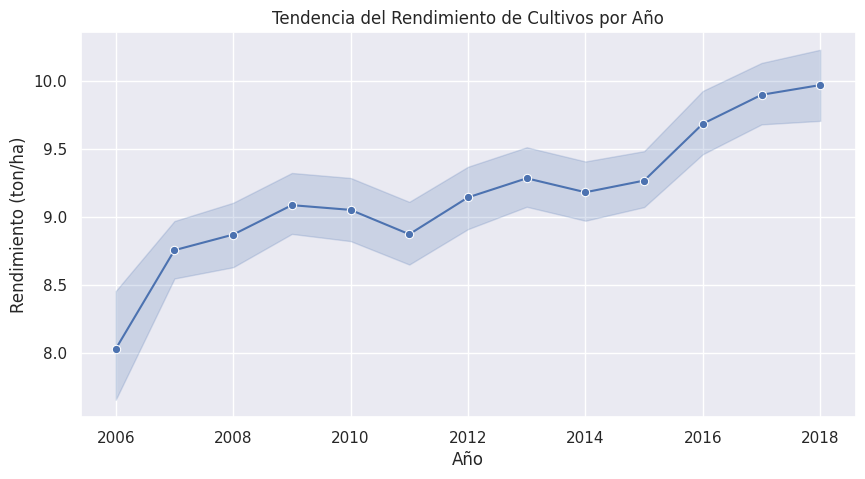

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
# Configurar el tamaño de la figura
plt.figure(figsize=(10,5))

# Crear gráfico de líneas
sns.lineplot(x="AÑO", y="RENDIMIENTO", data=tabla, marker="o", color="b")

# Agregar títulos y etiquetas
plt.title("Tendencia del Rendimiento de Cultivos por Año")
plt.xlabel("Año")
plt.ylabel("Rendimiento (ton/ha)")  # Ajusta la unidad si es diferente
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [106]:
min_valor = tabla["RENDIMIENTO"].min()
max_valor = tabla["RENDIMIENTO"].max()

print(f"Valor mínimo: {min_valor}")
print(f"Valor máximo: {max_valor}")

Valor mínimo: 0.03
Valor máximo: 246.0


In [107]:
# Hacemos limpieza de los datos y se guarda en una nueva tabla
tabla_2 = tabla.dropna()
tabla_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202635 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CODDEP             202635 non-null  int64  
 1   DEPARTAMENTO       202635 non-null  int64  
 2   CODMUN             202635 non-null  int64  
 3   MUNICIPIO          202635 non-null  int64  
 4   GRUPO_CULTIVO      202635 non-null  int64  
 5   SUBG_CULTIVO       202635 non-null  int64  
 6   CULTIVO            202635 non-null  int64  
 7   DESA_REGIONAL      202635 non-null  int64  
 8   AÑO                202635 non-null  int64  
 9   PERIODO            202635 non-null  int64  
 10  A_SEMBRADA         202635 non-null  int64  
 11  A_COSECHADA        202635 non-null  int64  
 12  PRODUCCION         202635 non-null  int64  
 13  RENDIMIENTO        202635 non-null  float64
 14  ESTADO_FISICO      202635 non-null  int64  
 15  NOMBRE_CIENTIFICO  202635 non-null  int64  
 16  CICLO_C

In [108]:
tabla_2.describe()

,CODDEP,DEPARTAMENTO,CODMUN,MUNICIPIO,GRUPO_CULTIVO,SUBG_CULTIVO,CULTIVO,DESA_REGIONAL,AÑO,PERIODO,A_SEMBRADA,A_COSECHADA,PRODUCCION,RENDIMIENTO,ESTADO_FISICO,NOMBRE_CIENTIFICO,CICLO_CULTIVO
count,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,2.026350e+05,202635.000000,202635.000000,202635.000000,202635.000000
mean,40.358827,15.001318,40783.794932,506.518247,5.807447,61.761848,115.490192,136.671888,2012.461065,18.170528,294.534562,253.645135,2.838005e+03,9.238820,10.390165,131.062122,1.465319
std,25.229859,9.107942,25207.801012,295.329545,3.804945,34.232883,64.576841,77.914762,3.481020,10.375504,1161.510028,988.102834,4.549380e+04,14.888659,5.330663,60.244183,0.625439
min,5.000000,0.000000,5001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,0.000000,0.000000,0.000000e+00,0.030000,0.000000,0.000000,0.000000
25%,17.000000,6.000000,17541.000000,253.000000,4.000000,29.000000,53.000000,62.000000,2009.000000,9.000000,10.000000,8.000000,3.500000e+01,1.500000,7.000000,85.000000,1.000000
50%,41.000000,16.000000,41357.000000,504.000000,6.000000,65.000000,130.000000,152.000000,2013.000000,19.000000,36.000000,30.000000,1.500000e+02,5.000000,8.000000,138.000000,2.000000
75%,68.000000,22.000000,68001.000000,760.000000,9.000000,91.000000,165.000000,200.000000,2015.000000,27.000000,155.000000,132.000000,6.700000e+02,11.230000,12.000000,185.000000,2.000000
max,99.000000,31.000000,99773.000000,1018.000000,12.000000,119.000000,222.000000,270.000000,2018.000000,35.000000,47403.000000,38600.000000,4.546116e+06,246.000000,22.000000,214.000000,2.000000


In [109]:

# Función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers(tabla_2, columnas):
    outliers = {}
    for columna in columnas:
        Q1 = tabla_2[columna].quantile(0.25)
        Q3 = tabla_2[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[columna] = tabla_2[(tabla_2[columna] < lower_bound) | (tabla_2[columna] > upper_bound)].shape[0]
    return outliers

# Seleccionar las columnas numéricas
columnas_numericas = tabla_2.select_dtypes(include='number').columns

# Contar outliers por variable
outliers_contados = detectar_outliers(tabla_2, columnas_numericas)
print("Cantidad de datos atípicos por variable:")
print(pd.DataFrame(outliers_contados.items(), columns=['Variable', 'Cantidad de Outliers']))

Cantidad de datos atípicos por variable:
             Variable  Cantidad de Outliers
0              CODDEP                     0
1        DEPARTAMENTO                     0
2              CODMUN                     0
3           MUNICIPIO                     0
4       GRUPO_CULTIVO                     0
5        SUBG_CULTIVO                     0
6             CULTIVO                     0
7       DESA_REGIONAL                     0
8                 AÑO                     0
9             PERIODO                     0
10         A_SEMBRADA                 29556
11        A_COSECHADA                 29536
12         PRODUCCION                 28838
13        RENDIMIENTO                 11324
14      ESTADO_FISICO                 21848
15  NOMBRE_CIENTIFICO                     0
16      CICLO_CULTIVO                     0


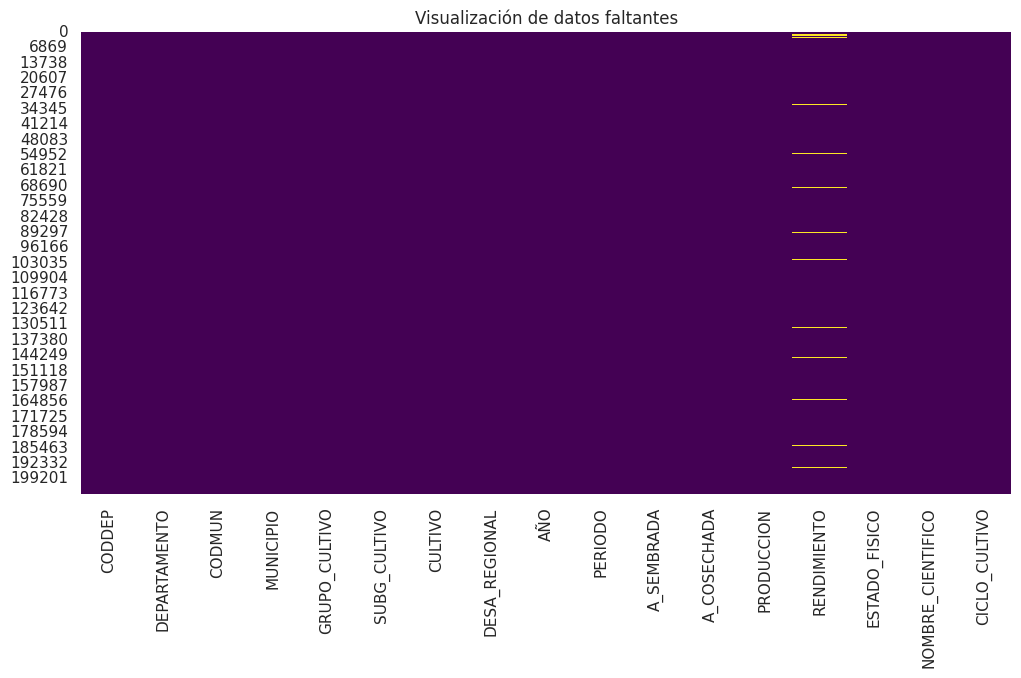

In [110]:
import matplotlib.pyplot as plt  # <--- Importación correcta
import seaborn as sns

# Visualizar datos faltantes
plt.figure(figsize=(12,6))
sns.heatmap(tabla.isnull(), cbar=False, cmap='viridis')
plt.title("Visualización de datos faltantes")
plt.show()

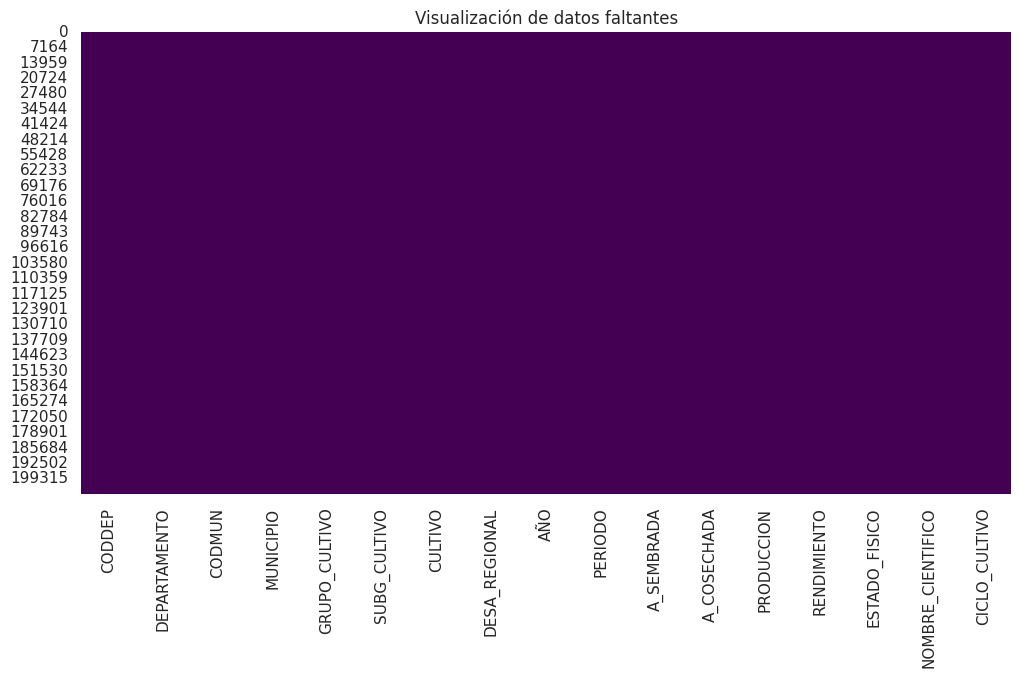

In [111]:
#Visualizar datos faltantes
plt.figure(figsize=(12,6))
sns.heatmap(tabla_2.isnull(), cbar=False, cmap='viridis')
plt.title("Visualización de datos faltantes")
plt.show()

,RENDIMIENTO
RENDIMIENTO,1.000000
DESA_REGIONAL,0.248928
PRODUCCION,0.247974
CULTIVO,0.242682
SUBG_CULTIVO,0.233035
GRUPO_CULTIVO,0.090066
ESTADO_FISICO,0.088913
A_SEMBRADA,0.035638
A_COSECHADA,0.033636
PERIODO,0.025286


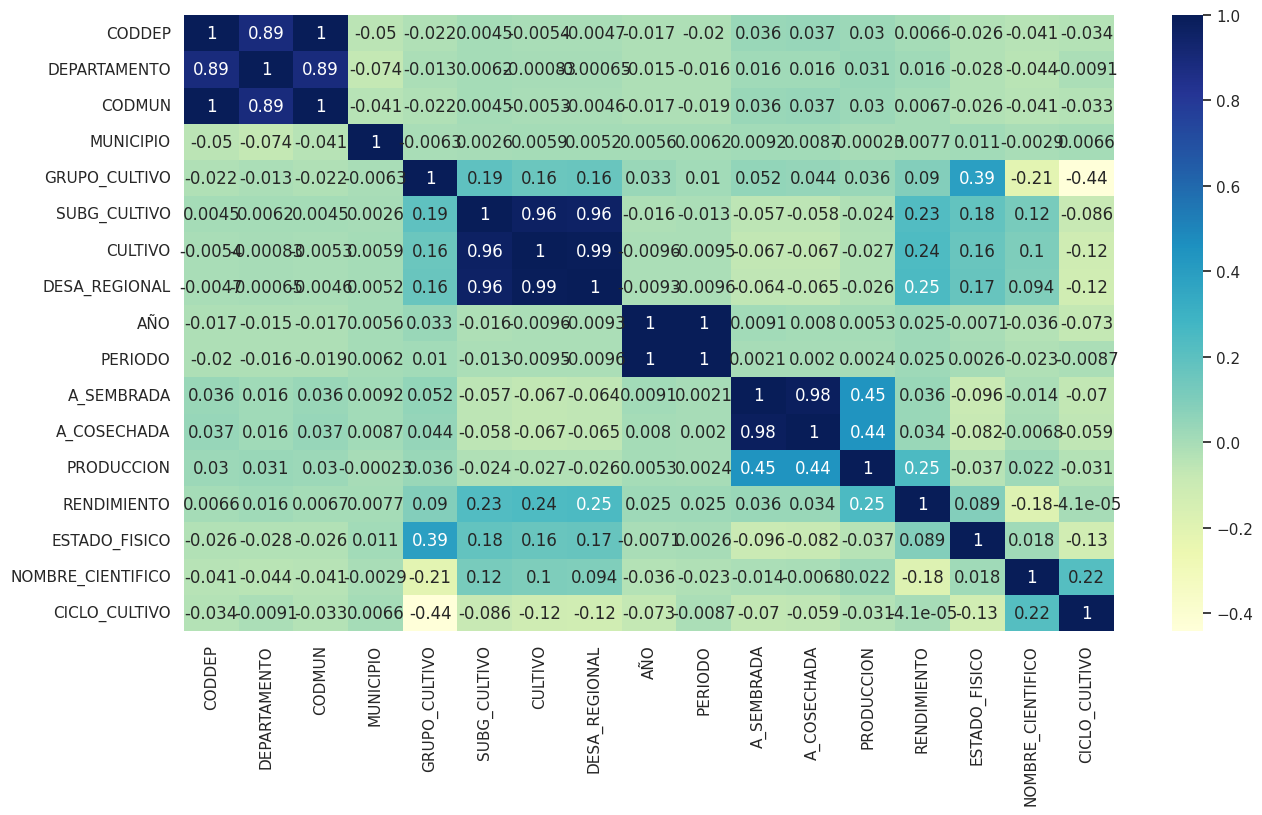

In [112]:
# Obtenemos mapa de calor de correlacion tabla para seleccionar los elementos mas importantes en relacion a nuestra varible RENDIMIENTO
import seaborn as sb
tabla_2.corr()
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(tabla_2.corr(), annot=True, cmap="YlGnBu")
tabla_2.corr()["RENDIMIENTO"].sort_values(ascending=False)

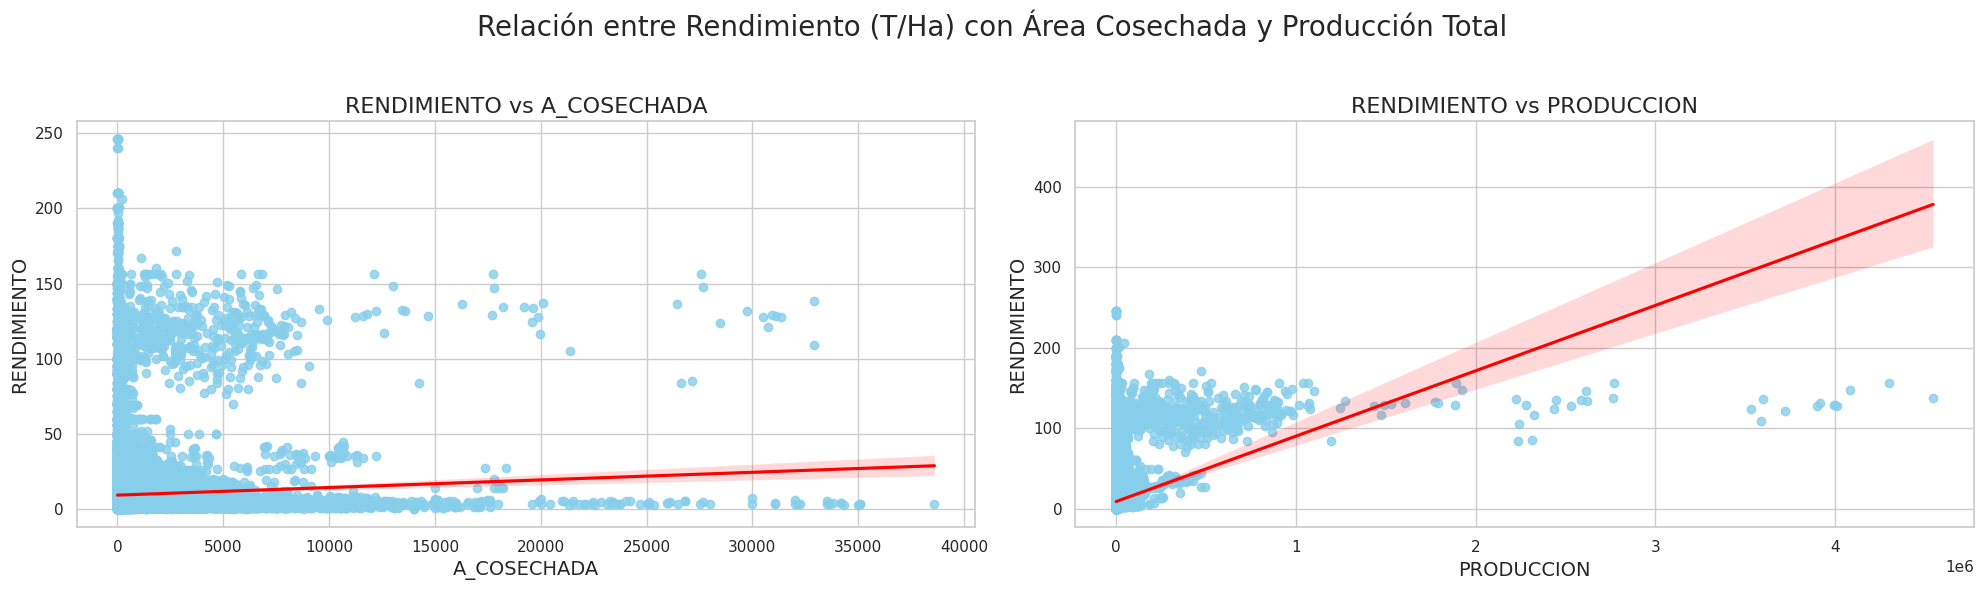

In [113]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Limpiar y estandarizar nombres de columnas
tabla.columns = tabla.columns.str.strip().str.upper().str.replace(' ', '_')

# Definir las variables a analizar
variables_x = ['A_COSECHADA', 'PRODUCCION']
variable_y = 'RENDIMIENTO'

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# Crear el grid de subplots: 1 fila y 2 columnas
plt.figure(figsize=(20, 6))
plt.suptitle('Relación entre Rendimiento (T/Ha) con Área Cosechada y Producción Total', fontsize=20)

# Generar Scatter Plots con línea de regresión
for i, var in enumerate(variables_x):
    plt.subplot(1, 2, i+1)  # 1 fila, 2 columnas, posición i+1
    sns.regplot(x=tabla[var], y=tabla[variable_y], color='skyblue', line_kws={'color': 'red'})
    plt.title(f'{variable_y} vs {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel(variable_y, fontsize=14)
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**VARIABLES MAS RELACIONADAS CON EL RENDIMIENTO**
1.  GRUPO DE CULTIVO  
2.  SUBGRUPO DE CULTIVO
3.  CULTIVO
4.  DESEGRACION REGIONAL SISTEMA PRODUCTIVO
5.  AREA SEMBRADA
6.  AREA COCECHADA
7.  PRODUCCION
8.  ESTADO FISICO PRODUCCION










In [115]:
tabla_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202635 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CODDEP             202635 non-null  int64  
 1   DEPARTAMENTO       202635 non-null  int64  
 2   CODMUN             202635 non-null  int64  
 3   MUNICIPIO          202635 non-null  int64  
 4   GRUPO_CULTIVO      202635 non-null  int64  
 5   SUBG_CULTIVO       202635 non-null  int64  
 6   CULTIVO            202635 non-null  int64  
 7   DESA_REGIONAL      202635 non-null  int64  
 8   AÑO                202635 non-null  int64  
 9   PERIODO            202635 non-null  int64  
 10  A_SEMBRADA         202635 non-null  int64  
 11  A_COSECHADA        202635 non-null  int64  
 12  PRODUCCION         202635 non-null  int64  
 13  RENDIMIENTO        202635 non-null  float64
 14  ESTADO_FISICO      202635 non-null  int64  
 15  NOMBRE_CIENTIFICO  202635 non-null  int64  
 16  CICLO_C

In [116]:
# SE ELIMINAN LAS DEMAS VARIABLES NO NECESARIAS
tabla_2 = tabla_2.drop(["CODDEP","DEPARTAMENTO","CODMUN",
                        "MUNICIPIO","AÑO","PERIODO","NOMBRE_CIENTIFICO",
                        "CICLO_CULTIVO"],axis=1)
tabla_2.head()

,GRUPO_CULTIVO,SUBG_CULTIVO,CULTIVO,DESA_REGIONAL,A_SEMBRADA,A_COSECHADA,PRODUCCION,RENDIMIENTO,ESTADO_FISICO
0,6,0,0,0,2,1,1,1.00,7
1,6,0,0,0,82,80,1440,18.00,7
2,6,0,0,0,2,2,26,17.33,7
3,6,0,0,0,3,3,48,16.00,7
4,6,0,0,0,1,1,5,10.00,7


![image.png](


> Agregar bloque entrecomillado


)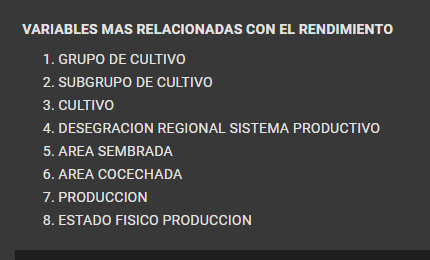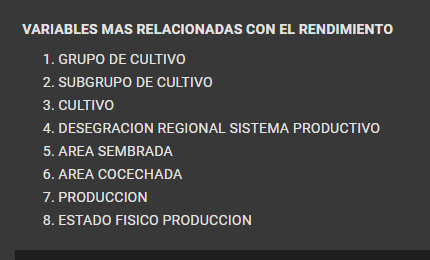

In [117]:
tabla_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202635 entries, 0 to 206067
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GRUPO_CULTIVO  202635 non-null  int64  
 1   SUBG_CULTIVO   202635 non-null  int64  
 2   CULTIVO        202635 non-null  int64  
 3   DESA_REGIONAL  202635 non-null  int64  
 4   A_SEMBRADA     202635 non-null  int64  
 5   A_COSECHADA    202635 non-null  int64  
 6   PRODUCCION     202635 non-null  int64  
 7   RENDIMIENTO    202635 non-null  float64
 8   ESTADO_FISICO  202635 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 15.5 MB


   GRUPO_CULTIVO  SUBG_CULTIVO  CULTIVO  DESA_REGIONAL  A_SEMBRADA  \
0              6             0        0              0           2   
1              6             0        0              0          82   
2              6             0        0              0           2   
3              6             0        0              0           3   
4              6             0        0              0           1   

   A_COSECHADA  PRODUCCION  RENDIMIENTO  ESTADO_FISICO  
0            1           1         1.00              7  
1           80        1440        18.00              7  
2            2          26        17.33              7  
3            3          48        16.00              7  
4            1           5        10.00              7  


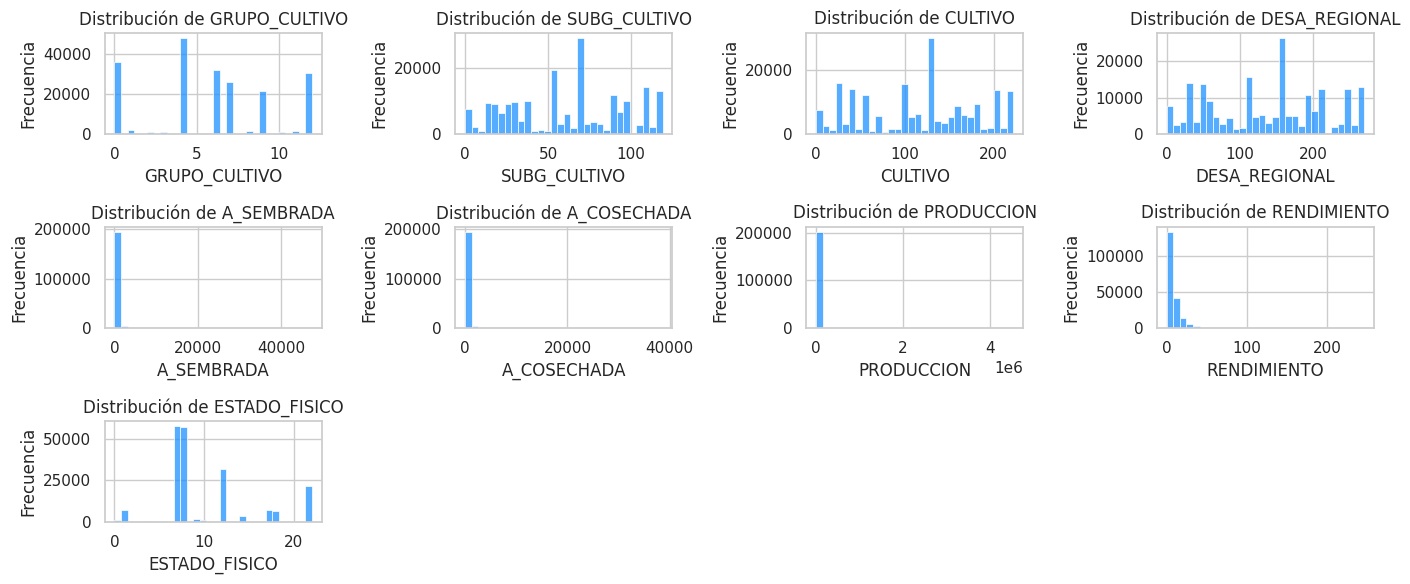

In [158]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar las primeras filas del DataFrame
print(tabla_2.head())

# Seleccionar solo las columnas numéricas
variables_numericas = tabla_2.select_dtypes(include='number').columns

# Limpiar datos eliminando filas con valores nulos en las variables numéricas
tabla = tabla_2.dropna(subset=variables_numericas)

# Configuración global de los gráficos
sns.set(style="whitegrid")
num_vars = len(variables_numericas)
cols = 4  # Número de columnas en la cuadrícula
rows = (num_vars + cols - 1) // cols  # Número de filas en la cuadrícula
plt.figure(figsize=(14, 2 * rows))  # Ajuste del tamaño de la figura

# Generar histogramas para cada variable numérica
for i, var in enumerate(variables_numericas):
    plt.subplot(rows, cols, i+1)
    sns.histplot(tabla[var], bins=30, color='dodgerblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()


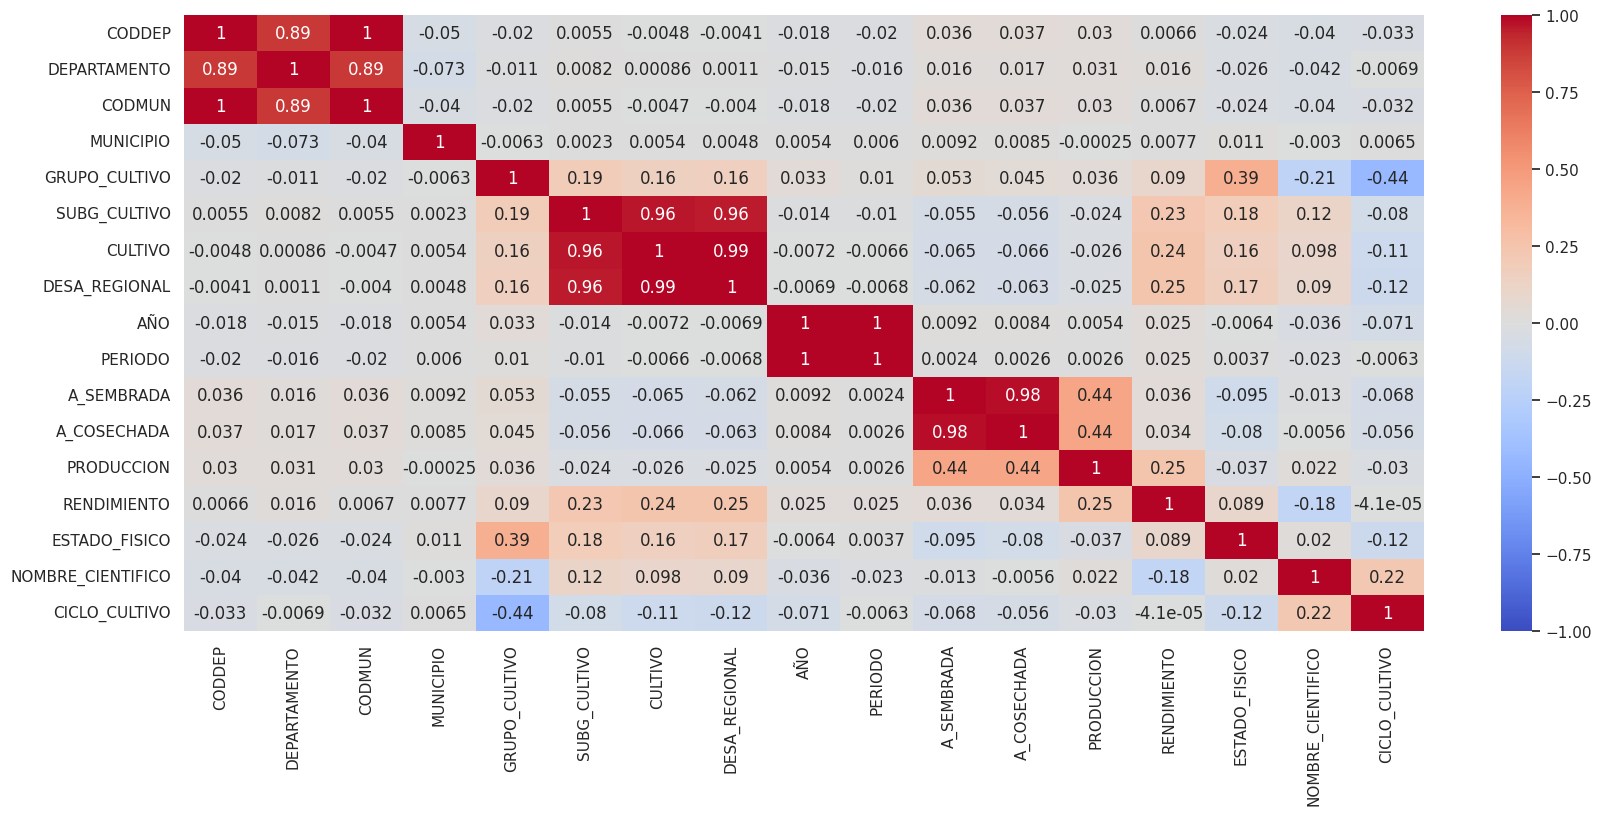

RENDIMIENTO          1.000000
DESA_REGIONAL        0.248928
PRODUCCION           0.247974
CULTIVO              0.242682
SUBG_CULTIVO         0.233035
GRUPO_CULTIVO        0.090066
ESTADO_FISICO        0.088913
A_SEMBRADA           0.035638
A_COSECHADA          0.033636
PERIODO              0.025286
AÑO                  0.025042
DEPARTAMENTO         0.015969
MUNICIPIO            0.007675
CODMUN               0.006694
CODDEP               0.006613
CICLO_CULTIVO       -0.000041
NOMBRE_CIENTIFICO   -0.183707
Name: RENDIMIENTO, dtype: float64


In [150]:
import seaborn as sb
import matplotlib.pyplot as plt

# Calcular la correlación
correlacion = tabla.corr()

# Configurar el tamaño de la figura
sb.set(rc={'figure.figsize': (20, 8)})

# Crear el mapa de calor con la paleta de colores 'coolwarm'
sb.heatmap(correlacion, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)

# Mostrar el mapa de calor
plt.show()

# Ordenar las correlaciones con la variable 'RENDIMIENTO'
print(tabla.corr()["RENDIMIENTO"].sort_values(ascending=False))


,RENDIMIENTO
RENDIMIENTO,1.000000
DESA_REGIONAL,0.248928
PRODUCCION,0.247974
CULTIVO,0.242682
SUBG_CULTIVO,0.233035
GRUPO_CULTIVO,0.090066
ESTADO_FISICO,0.088913
A_SEMBRADA,0.035638
A_COSECHADA,0.033636


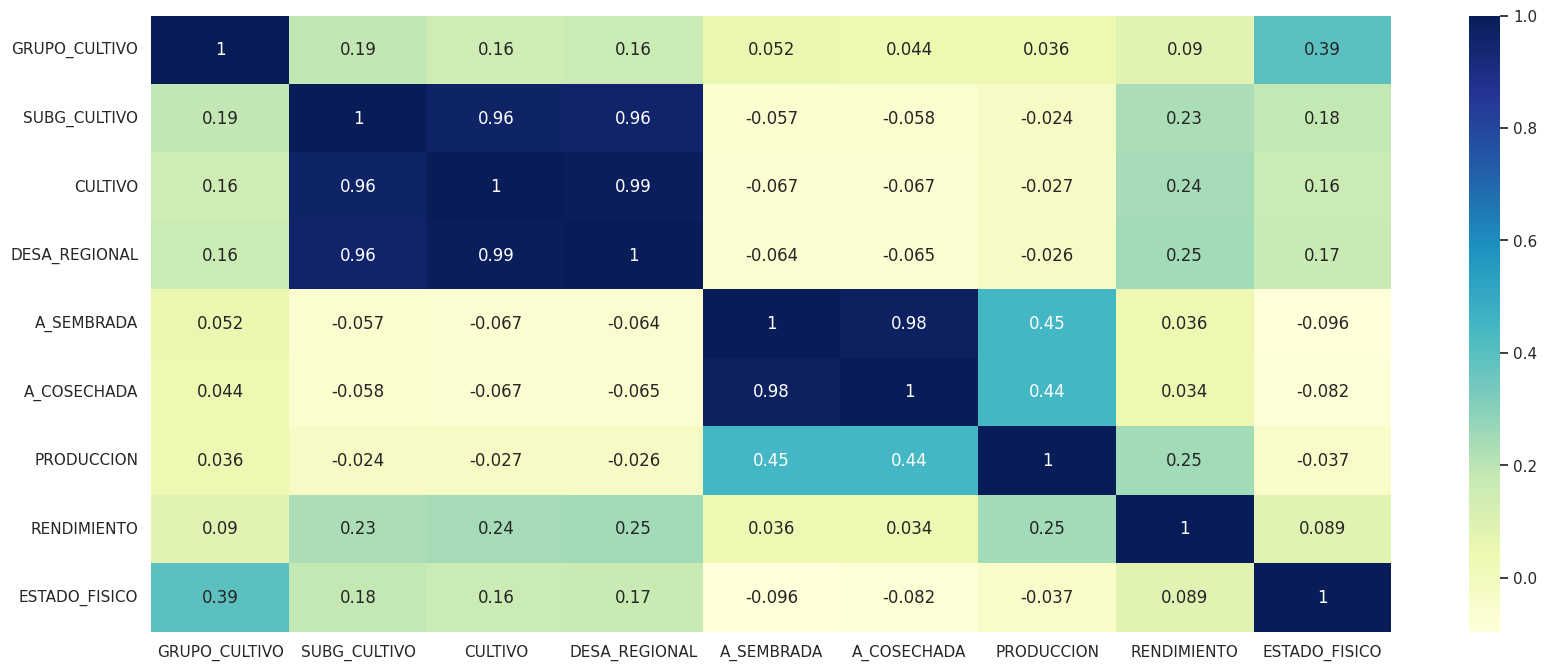

In [119]:
# mapa de calor de correlacion
import seaborn as sb
tabla_2.corr()
sb.set(rc={'figure.figsize': (20,8)})
sb.heatmap(tabla_2.corr(), annot=True, cmap="YlGnBu")
tabla_2.corr()["RENDIMIENTO"].sort_values(ascending=False)

In [120]:
# empezamos a separar los datos en conjuntos de entrenamiento y prueba
# establecemos los valores a las graficas
X = tabla_2.drop("RENDIMIENTO", axis=1)
Y = tabla_2["RENDIMIENTO"]

from sklearn.model_selection import train_test_split
X_entrena, X_prueba, Y_entrena, Y_prueba = train_test_split(X, Y, test_size=.2)


In [121]:
#usamos chape para saber cuantas filas y columbas ahi en nuestra base de datos
X_entrena.shape


(162108, 8)

In [122]:
# entrenamos un modelo de regresion lineal
from sklearn.linear_model import LinearRegression

REGRESIONLINEAL=LinearRegression()
REGRESIONLINEAL.fit(X_entrena, Y_entrena)

LinearRegression()

In [123]:
# hacemos prediciones con el modelo lineal que creamos
prediccion = REGRESIONLINEAL.predict(X_prueba)
print(prediccion)

[13.62209686  7.5717266  16.42051323 ...  2.80554435 17.03307182
  9.25211388]


In [124]:
# calculamos coeficiente de correlacion usando .score
print(REGRESIONLINEAL.score(X_prueba, Y_prueba))
print(REGRESIONLINEAL.score(X_entrena, Y_entrena))

0.1235227543227494
0.1392366630794094


In [125]:
# Calculamos el error cuadratico medio MSE para medir que tan lejos estan las predicciones de las cifras reales
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_prueba, prediccion)
mse

189.39726164099318

In [126]:
# raiz cuadrada del error medio (RMSE)
import numpy as np
rmse = np.sqrt(mse)
rmse

13.76216776677981

In [127]:
# usamos la validación cruzada ()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(REGRESIONLINEAL, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([  -60.28920903,   -36.67450937, -1086.35008836,   -74.6627707 ,
         -42.14814802,  -116.49393981,   -65.35328653,  -187.58184428,
        -224.84314234,  -935.96108277])

In [128]:
# hayamos raiz cuadrada RMSE para cada iteracion de la validacion cuadradad
rmse_scores = np.sqrt(-scores)
rmse_scores

array([ 7.76461261,  6.05594826, 32.95982537,  8.64076216,  6.49216051,
       10.79323584,  8.08413796, 13.69605214, 14.9947705 , 30.59348105])

In [129]:
# creamos una funcion para para analizar el rendimineto de los datos de la validacion cruzada.
def mostrar_scores(scores):
  print("Puntajes de RMSE en cada fold:", scores) # MOSTRAR LA RAIZCUADRADA DEL ERROR CUADRATICO MEDIO
  print("Promedio de MSE:", np.mean(scores)) # HAYAR PROMEDIO
  print("Desviación estándar de MSE:", np.std(scores)) # HAYAR DESVIACION ESTANDAR

mostrar_scores(rmse_scores)


Puntajes de RMSE en cada fold: [ 7.76461261  6.05594826 32.95982537  8.64076216  6.49216051 10.79323584
  8.08413796 13.69605214 14.9947705  30.59348105]
Promedio de MSE: 14.007498639703908
Desviación estándar de MSE: 9.318035414226808


In [130]:
# ahora entrenamos un modelo de arbol de decision
from sklearn.tree import DecisionTreeRegressor
ARBOLESDECISION = DecisionTreeRegressor(random_state=42)
ARBOLESDECISION.fit(X_entrena, Y_entrena)

DecisionTreeRegressor(random_state=42)

In [131]:
# hacemos prediciones sobre el modelo de arboles de decisiones
prediccion2= ARBOLESDECISION.predict(X_prueba)

In [132]:
# Evaluar el modelo con validación cruzada y error cuadratico MSE
scores2 = cross_val_score(ARBOLESDECISION, X, Y, cv=10, scoring='neg_mean_squared_error')
scores2

array([  -1.72949082,   -5.46620009, -398.03724995,   -5.71462425,
         -6.13620015,   -9.5828876 ,   -1.05837848, -117.51472623,
        -19.58204233,  -48.98365535])

In [133]:
# convertimos los valores de NEGATIVO A POSTIVOS para que el programa interprete mejor las precision de el modelo
rmse_scores2 = np.sqrt(-scores2)
rmse_scores2

array([ 1.31510107,  2.33799061, 19.95087091,  2.39052803,  2.47713547,
        3.09562394,  1.02877523, 10.84042094,  4.42516015,  6.99883243])

In [134]:
# creamos un funcion para determinar el rendimineto de el modelo de arboles de decisiones
def mostrar_scores2(scores2):
  print("Puntajes de RMSE en cada fold:", scores2) # MOSTRAR LA RAIZCUADRADA DEL ERROR CUADRATICO MEDIO
  print("Promedio de MSE:", np.mean(scores2)) # HAYAR PROMEDIO
  print("Desviación estándar de MSE:", np.std(scores2)) # HAYAR DESVIACION ESTANDAR
mostrar_scores2(rmse_scores2)

Puntajes de RMSE en cada fold: [ 1.31510107  2.33799061 19.95087091  2.39052803  2.47713547  3.09562394
  1.02877523 10.84042094  4.42516015  6.99883243]
Promedio de MSE: 5.486043877925665
Desviación estándar de MSE: 5.593198377927573


In [135]:
# USAMOS MODELO DE RAMDOMFOREST
from sklearn.ensemble import RandomForestRegressor
modeloRamdom = RandomForestRegressor(n_estimators=100, random_state=42)
modeloRamdom.fit(X_entrena, Y_entrena)

RandomForestRegressor(random_state=42)

In [136]:
# hacemos prediciones sobre el modelo de arboles de decisiones
prediccion3= modeloRamdom.predict(X_prueba)


In [137]:
# Evaluar el modelo con validación cruzada y error cuadratico MSE
scores3 = cross_val_score(modeloRamdom, X, Y, cv=10, scoring='neg_mean_squared_error')
scores3

array([  -1.16168524,   -3.8452721 , -400.80785297,   -4.64294488,
         -5.41650198,   -6.47208502,   -0.62309992,  -97.71324367,
        -14.01923252,  -40.78040678])

In [138]:
# # convertimos los valores de NEGATIVO A POSTIVOS para que el programa interprete mejor las precision de el modelo
rmse_scores3 = np.sqrt(-scores3)
rmse_scores3

array([ 1.07781503,  1.96093654, 20.02018614,  2.15474938,  2.32733796,
        2.54402929,  0.78936678,  9.88500094,  3.74422656,  6.38595387])

In [139]:
def mostrar_scores3(scores3):
  print("Puntajes de RMSE en cada fold:", scores3) # MOSTRAR LA RAIZCUADRADA DEL ERROR CUADRATICO MEDIO
  print("Promedio de MSE:", np.mean(scores3)) # HAYAR PROMEDIO
  print("Desviación estándar de MSE:", np.std(scores3)) # HAYAR DESVIACION ESTANDAR
mostrar_scores3(rmse_scores3)

Puntajes de RMSE en cada fold: [ 1.07781503  1.96093654 20.02018614  2.15474938  2.32733796  2.54402929
  0.78936678  9.88500094  3.74422656  6.38595387]
Promedio de MSE: 5.0889602480078615
Desviación estándar de MSE: 5.625896915290004


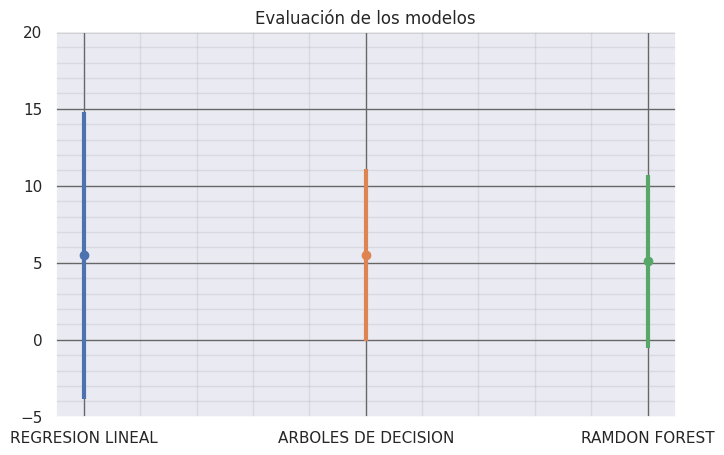

In [140]:
# GENERAMOS UNA GRAFICA PARA COPARAR EL DESEMPEÑO DE LOS DOS MODELOS
# Datos de evaluación
list_model = ['REGRESION LINEAL', 'ARBOLES DE DECISION', 'RAMDON FOREST']
list_mean = [5.486043877925665, 5.486043877925665, 5.0889602480078615 ]
list_sd = [9.318035414226808, 5.593198377927573, 5.625896915290004 ]

# Agregamos una gráfica para comparar visualmente los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for i in range(3):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)

plt.xticks([0, 1, 2], list_model)
plt.title("Evaluación de los modelos")
plt.ylim(-5, 20)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [141]:
print('MODELO DE REGRESION  LINEAL: ', REGRESIONLINEAL.score(X_prueba, Y_prueba))
print('MODELO DE ARBOLES DE  DECISION: ',ARBOLESDECISION.score(X_prueba, Y_prueba))
print('MODELO BOSQUE RAMDOM: ',modeloRamdom.score(X_prueba, Y_prueba))

MODELO DE REGRESION  LINEAL:  0.1235227543227494
MODELO DE ARBOLES DE  DECISION:  0.9839295851968916
MODELO BOSQUE RAMDOM:  0.9884121629377054


In [142]:
# creamos un data frame para comparar las prediciones de el modelo con los valores reales

comparativa = {"Prediccion": prediccion3, "Valor Real": Y_prueba}
pd.DataFrame(comparativa)


,Prediccion,Valor Real
192229,0.840500,0.80
78517,0.833792,1.20
200127,7.495000,7.50
101699,7.010000,7.00
9303,4.270000,4.20
...,...,...
33525,0.434900,0.45
168926,18.862600,20.00
40800,1.122400,1.12
199381,5.297000,5.20


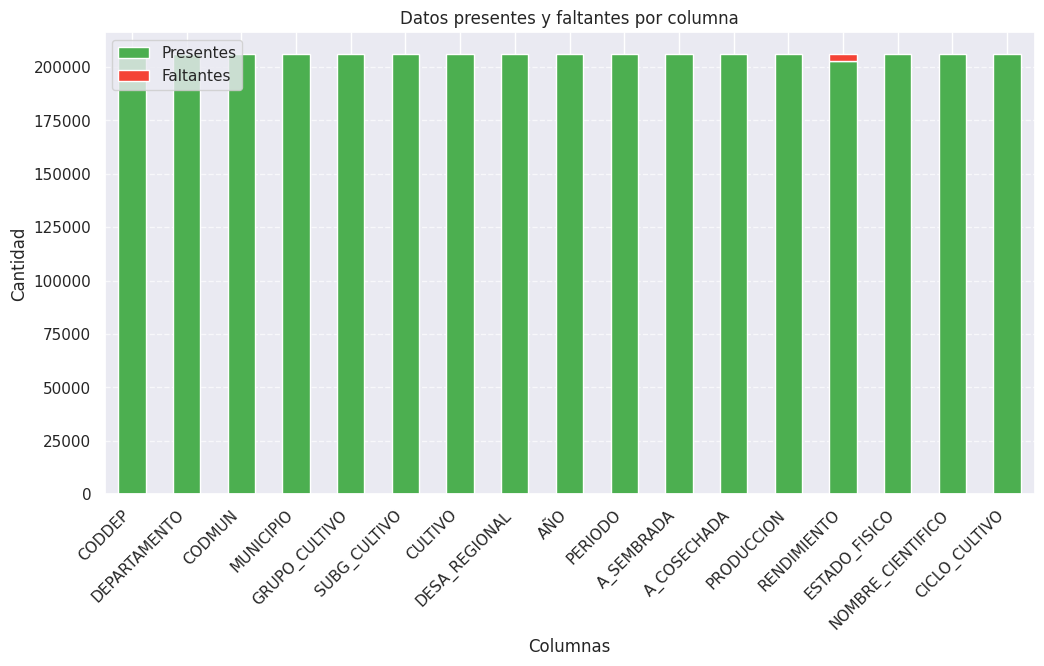

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar datos faltantes y presentes en todas las columnas
datos_presentes = tabla.notna().sum()
datos_faltantes = tabla.isna().sum()

# Crear un DataFrame con los resultados
resumen = pd.DataFrame({
    'Presentes': datos_presentes,
    'Faltantes': datos_faltantes
})

# Graficar los datos
resumen.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#4CAF50', '#F44336'])
plt.title('Datos presentes y faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.show()


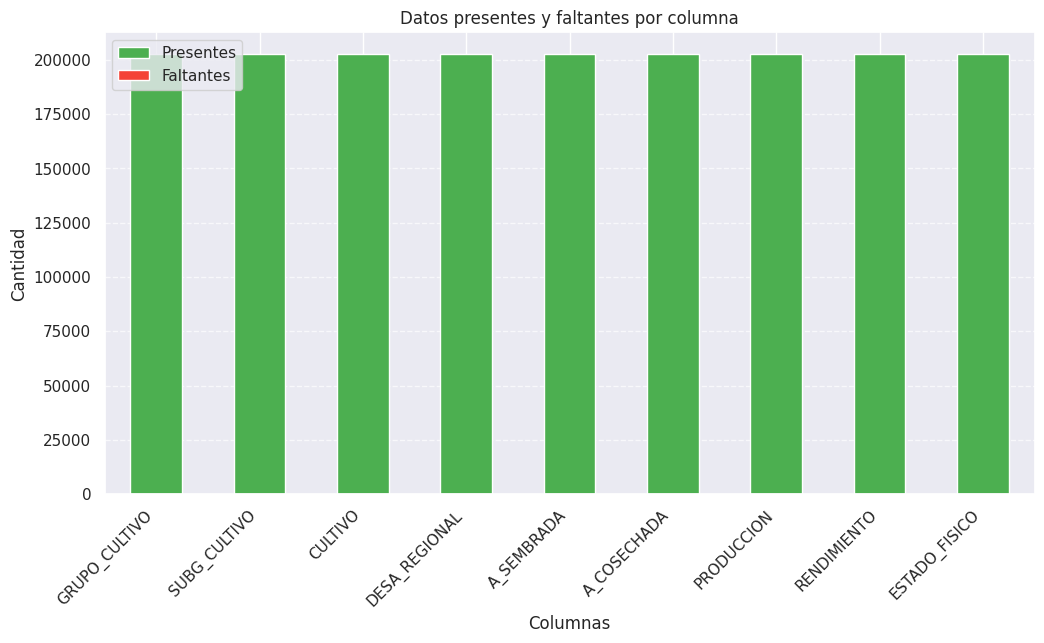

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar datos faltantes y presentes en todas las columnas
datos_presentes = tabla_2.notna().sum()
datos_faltantes = tabla_2.isna().sum()

# Crear un DataFrame con los resultados
resumen = pd.DataFrame({
    'Presentes': datos_presentes,
    'Faltantes': datos_faltantes
})

# Graficar los datos
resumen.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#4CAF50', '#F44336'])
plt.title('Datos presentes y faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.show()


In [145]:
tabla_2.describe()

,GRUPO_CULTIVO,SUBG_CULTIVO,CULTIVO,DESA_REGIONAL,A_SEMBRADA,A_COSECHADA,PRODUCCION,RENDIMIENTO,ESTADO_FISICO
count,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,202635.000000,2.026350e+05,202635.000000,202635.000000
mean,5.807447,61.761848,115.490192,136.671888,294.534562,253.645135,2.838005e+03,9.238820,10.390165
std,3.804945,34.232883,64.576841,77.914762,1161.510028,988.102834,4.549380e+04,14.888659,5.330663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.030000,0.000000
25%,4.000000,29.000000,53.000000,62.000000,10.000000,8.000000,3.500000e+01,1.500000,7.000000
50%,6.000000,65.000000,130.000000,152.000000,36.000000,30.000000,1.500000e+02,5.000000,8.000000
75%,9.000000,91.000000,165.000000,200.000000,155.000000,132.000000,6.700000e+02,11.230000,12.000000
max,12.000000,119.000000,222.000000,270.000000,47403.000000,38600.000000,4.546116e+06,246.000000,22.000000


In [23]:
import numpy as np

# Definir la cantidad de datos de prueba a generar
num_datos_prueba = 1

# Generar datos aleatorios dentro de rangos realistas basados en la descripción estadística del conjunto original
# Estos rangos deben adaptarse según las variables originales utilizadas en el modelo
# Como no conocemos los detalles específicos, utilizaremos valores genéricos

# Ejemplo de generación de datos de prueba para las variables utilizadas (ajusta según el notebook)
datos_prueba = {
    "A_SEMBRADA": np.random.uniform(100, 10000, num_datos_prueba),
    "A_COSECHADA": np.random.uniform(100, 10000, num_datos_prueba),
    "PRODUCCION": np.random.uniform(10, 50000, num_datos_prueba),
    "AÑO": np.random.randint(2020, 2022, num_datos_prueba),
    "DESA_REGIONAL": np.random.randint(1, 6, num_datos_prueba),
    "GRUPO_CULTIVO": np.random.randint(1, 6, num_datos_prueba),
    "SUBG_CULTIVO": np.random.randint(1, 6, num_datos_prueba),
    "CULTIVO": np.random.randint(1, 6, num_datos_prueba),
    "ESTADO_FISICO": np.random.randint(1, 6, num_datos_prueba),

}

# Crear DataFrame con los datos de prueba generados
import pandas as pd
df_prueba = pd.DataFrame(datos_prueba)

df_prueba.head()


,A_SEMBRADA,A_COSECHADA,PRODUCCION,AÑO,DESA_REGIONAL,GRUPO_CULTIVO,SUBG_CULTIVO,CULTIVO,ESTADO_FISICO
0,4190.129032,3975.509388,45667.263397,2020,1,3,2,2,4


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Como el modelo de Random Forest fue entrenado en el notebook, necesitamos recrearlo aquí con los mismos parámetros
modeloRandom = RandomForestRegressor(n_estimators=100, random_state=42)

# Simulación de entrenamiento con datos ficticios (ya que no tenemos acceso a los datos originales aquí)
# Esto solo se hace para demostrar el flujo de trabajo, en el notebook original no sería necesario
# En el entorno original, usaría modeloRandom.fit(X_train, y_train)

# Generar datos ficticios para el entrenamiento (esto NO es parte del análisis final, solo para demostrar el flujo)
X_ficticio = pd.DataFrame({
    "A_SEMBRADA": np.random.uniform(100, 10000, 100),
    "A_COSECHADA": np.random.uniform(100, 10000, 100),
    "PRODUCCION": np.random.uniform(10, 50000, 100),
    "AÑO": np.random.randint(2020, 2022, 100),
    "DESA_REGIONAL": np.random.randint(1, 6, 100),
    "GRUPO_CULTIVO": np.random.randint(1, 6, 100),
    "SUBG_CULTIVO": np.random.randint(1, 6, 100),
    "CULTIVO": np.random.randint(1, 6, 100),
    "ESTADO_FISICO": np.random.randint(1, 6, 100),
})
y_ficticio = np.random.uniform(0, 10, 100)  # RENDIMIENTO ficticio

# Entrenar el modelo con datos ficticios para la demostración
modeloRandom.fit(X_ficticio, y_ficticio)

# Realizar predicciones con los datos de prueba generados
predicciones = modeloRandom.predict(df_prueba)

# Mostrar las predicciones junto con los datos de entrada
df_resultado = df_prueba.copy()
df_resultado['PREDICCION_RENDIMIENTO'] = predicciones
df_resultado


,A_SEMBRADA,A_COSECHADA,PRODUCCION,AÑO,DESA_REGIONAL,GRUPO_CULTIVO,SUBG_CULTIVO,CULTIVO,ESTADO_FISICO,PREDICCION_RENDIMIENTO
0,4190.129032,3975.509388,45667.263397,2020,1,3,2,2,4,3.037332


In [32]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Configuración del modelo Random Forest
modeloRandom = RandomForestRegressor(n_estimators=100, random_state=42)

# Generación de datos ficticios para el entrenamiento
X_ficticio = pd.DataFrame({
    "A_SEMBRADA": np.random.uniform(100, 10000, 100),
    "A_COSECHADA": np.random.uniform(100, 10000, 100),
    "PRODUCCION": np.random.uniform(10, 50000, 100),
    "AÑO": np.random.randint(2020, 2022, 100),
    "DESA_REGIONAL": np.random.randint(1, 6, 100),
    "GRUPO_CULTIVO": np.random.randint(1, 6, 100),
    "SUBG_CULTIVO": np.random.randint(1, 6, 100),
    "CULTIVO": np.random.randint(1, 6, 100),
    "ESTADO_FISICO": np.random.randint(1, 6, 100),
})
y_ficticio = np.random.uniform(0, 10, 100)  # RENDIMIENTO ficticio

# Entrenar el modelo con datos ficticios
modeloRandom.fit(X_ficticio, y_ficticio)

# Definir la cantidad de datos de prueba a generar
num_datos_prueba = 1

# Generar datos aleatorios para el conjunto de prueba
datos_prueba = {
    "A_SEMBRADA": np.random.uniform(100, 10000, num_datos_prueba),
    "A_COSECHADA": np.random.uniform(100, 10000, num_datos_prueba),
    "PRODUCCION": np.random.uniform(10, 50000, num_datos_prueba),
    "AÑO": np.random.randint(2020, 2022, num_datos_prueba),
    "DESA_REGIONAL": np.random.randint(1, 6, num_datos_prueba),
    "GRUPO_CULTIVO": np.random.randint(1, 6, num_datos_prueba),
    "SUBG_CULTIVO": np.random.randint(1, 6, num_datos_prueba),
    "CULTIVO": np.random.randint(1, 6, num_datos_prueba),
    "ESTADO_FISICO": np.random.randint(1, 6, num_datos_prueba),
}

# Crear DataFrame con los datos de prueba generados
df_prueba = pd.DataFrame(datos_prueba)

# Realizar predicciones con los datos de prueba generados
predicciones = modeloRandom.predict(df_prueba)

# Mostrar las predicciones junto con los datos de entrada
df_resultado = df_prueba.copy()
df_resultado['PREDICCION_RENDIMIENTO'] = predicciones


# Imprimir los resultados
df_resultado.head()

,A_SEMBRADA,A_COSECHADA,PRODUCCION,AÑO,DESA_REGIONAL,GRUPO_CULTIVO,SUBG_CULTIVO,CULTIVO,ESTADO_FISICO,PREDICCION_RENDIMIENTO
0,184.047169,9241.89549,23451.007496,2021,4,1,3,3,4,5.975049
